In [1]:
import polars as pl 
import pandas as pd

data = pl.read_csv("/home/sherman/Bureau/evalues.tsv", separator = "\t", has_header=False)
data.columns = ("query","subject","identity","osef1","osef2","osef3","qstart","qend","sstart","send","evalue","bitscore")
data.head()

query,subject,identity,osef1,osef2,osef3,qstart,qend,sstart,send,evalue,bitscore
str,str,f64,i64,i64,i64,i64,i64,i64,i64,f64,f64
"""rna-NM_0011800…","""Sbay_1.96""",88.43,121,13,1,1,120,1,121,4.4600e-71,206.0
"""rna-NM_0011800…","""Sbay_1.88""",88.43,121,13,1,1,120,1,121,4.4600e-71,206.0
"""rna-NM_0011800…","""Sbay_14.413""",91.736,121,9,1,1,120,1,121,3.7600e-69,201.0
"""rna-NM_0011800…","""Sbay_6.39""",90.909,121,10,1,1,120,1,121,8.1800e-69,200.0
"""rna-NM_0011800…","""Sbay_5.106""",89.167,120,10,1,1,117,1,120,4.8400e-67,196.0


In [2]:
df = pl.DataFrame()

for query, matches in data.groupby("query"):

    df = pl.concat([df , matches.sort("evalue", descending = True).head(1)])


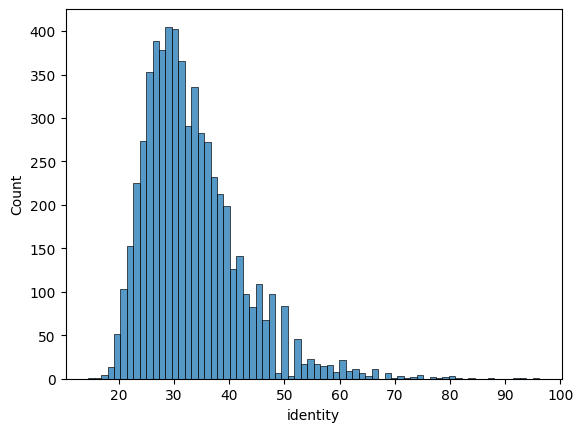

In [3]:
import polars as pl 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pdf = df.to_pandas()

plt.figure()
sns.histplot(x='identity', data= pdf,  bins=70)
plt.title('')
plt.show()

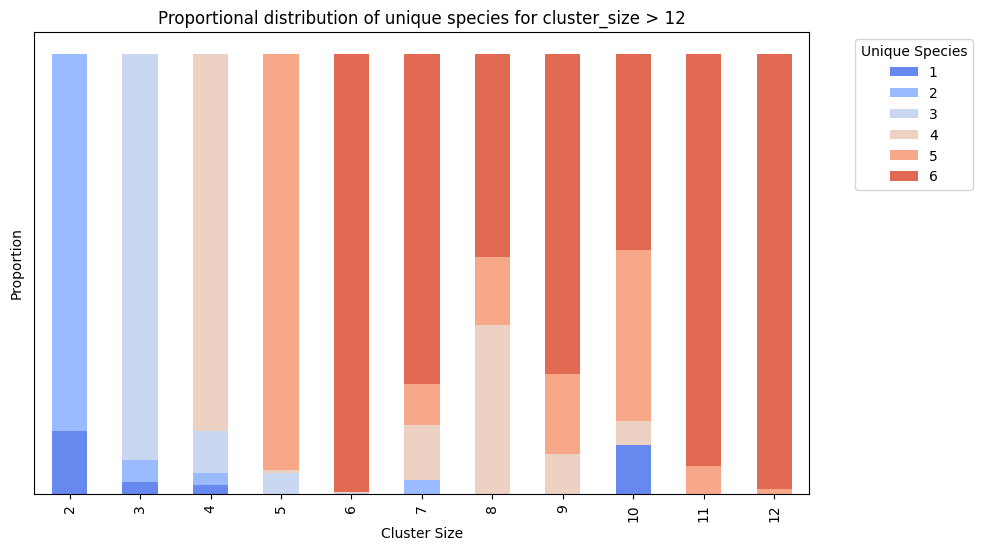

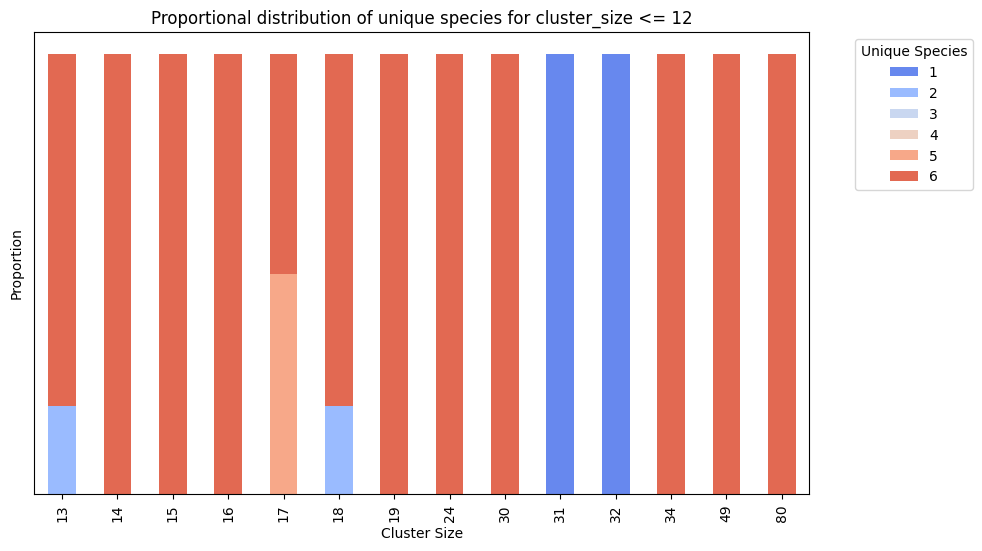

In [1]:
import polars as pl 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


cov = 0.5

df = pl.from_pandas(pd.read_csv(f"output/{cov}/{cov}_elongates.csv", low_memory = False))



pdf = df.to_pandas()

unique_species_values = sorted(df['unique_species'].unique())

colors = sns.color_palette("coolwarm", n_colors=len(unique_species_values))
color_map = dict(zip(unique_species_values, colors))


grouped = pdf.groupby(['cluster_size', 'unique_species']).size().reset_index(name='count')

pivot_df = grouped.pivot(index='cluster_size', columns='unique_species', values='count').fillna(0)
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)  # Normalize to make sum of each row equal to 1


threshold = 12
part1_df = pivot_df[pivot_df.index <= threshold]
part2_df = pivot_df[pivot_df.index > threshold]

plt.figure(figsize=(10,6))
part1_df.plot(kind='bar', stacked=True, color=[color_map[col] for col in pivot_df.columns], ax=plt.gca())
plt.title(f'Proportional distribution of unique species for cluster_size > {threshold}')
plt.ylabel('Proportion')
plt.xlabel('Cluster Size')
plt.yticks([])
plt.legend(title='Unique Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(-0.5, len(part1_df)-0.5)  
plt.show()

plt.figure(figsize=(10,6))
part2_df.plot(kind='bar', stacked=True, color=[color_map[col] for col in pivot_df.columns], ax=plt.gca())
plt.title(f'Proportional distribution of unique species for cluster_size <= {threshold}')
plt.ylabel('Proportion')
plt.xlabel('Cluster Size')
plt.legend(title='Unique Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks([])
plt.xlim(-0.5, len(part2_df)-0.5)
plt.show()


In [67]:
import polars as pl

# Sample data in Polars DataFrame
df = pl.DataFrame({
    'query_id': ['rna-NM_001178148.1', 'rna-NM_001178148.1', 'rna-NM_001178148.1', 'rna-NM_001178148.1', 'rna-NM_001178148.1', 'rna-NM_001178148.1', 'rna-NM_001178148.1', 'rna-NM_001178148.1', 'rna-NM_001178201.2'],
    'subject_id': ['Sarb_01G00560.1', 'Sarb_01G00560.1', 'Sarb_01G00560.1', 'Sarb_01G00560.1', 'rna-XM_033908579.1', 'rna-XM_033908579.1', 'rna-XM_033908579.1', 'rna-XM_033908579.1', 'Sarb_01G00040.1'],
    's_specie': ['Sarb', 'Sarb', 'Sarb', 'Sarb', 'Spar_NCBI', 'Spar_NCBI', 'Spar_NCBI', 'Spar_NCBI', 'Sarb'],
    'condition': ['protein', 'protein', 'protein', 'nucleotide', 'protein', 'protein', 'protein', 'nucleotide', 'protein'],
    'relative_frame': ['f2', 'f1', 'f0', 'NA', 'f0', 'f2', 'f1', 'NA', 'f1'],
    'evalue': [1.2, 0.0, 2.8e-26, 0.0, 9e-21, 2.2, 1.9, 6.2e-9, 2.7]
})

# Filtering for protein conditions only
protein_df = df.filter(df['condition'] == "protein")

# Sorting by query_id and evalue
sorted_df = protein_df.sort(['query_id', 'evalue'])

# Getting the row with the minimum evalue for each query
best_protein_df = sorted_df.groupby('query_id').agg(pl.col('evalue').first().alias('evalue'),
                                                   pl.col('subject_id').first().alias('subject_id'),
                                                   pl.col('s_specie').first().alias('s_specie'),
                                                   pl.col('condition').first().alias('condition')
                                                  
                                                   )


nuc_df = df.filter(df['condition'] == "nucleotide").select("query_id","evalue","subject_id","s_specie","condition")

df = pl.concat([best_protein_df,nuc_df])
df


query_id,evalue,subject_id,s_specie,condition
str,f64,str,str,str
"""rna-NM_0011781…",0.0,"""Sarb_01G00560.…","""Sarb""","""protein"""
"""rna-NM_0011782…",2.7,"""Sarb_01G00040.…","""Sarb""","""protein"""
"""rna-NM_0011781…",0.0,"""Sarb_01G00560.…","""Sarb""","""nucleotide"""
"""rna-NM_0011781…",6.2000e-9,"""rna-XM_0339085…","""Spar_NCBI""","""nucleotide"""


In [11]:
from Bio import SeqIO
import yaml 


#################

## STATISTIQUES DU NETTOYAGE DES DONNEES D'INPUT

#################

with open('/home/sherman/Bureau/Gits/Elongates/env.yaml', 'r') as f:
    yaml_data = yaml.safe_load(f)
    species_order = yaml_data['Species_order']['Scer']


records = 0
records_corr = 0
for specie in species_order:

    raw = len(list(SeqIO.parse(f"/home/sherman/Bureau/Gits/Elongates/input/{specie}_CDS.pep", "fasta")))
    corr = len(list(SeqIO.parse(f"/home/sherman/Bureau/Gits/Elongates/input/{specie}_CDS_corr.pep", "fasta")))


    print(f"{specie} : raw = {raw} | corr = {corr} | loss = {(raw - corr)/raw * 100}")
    records += raw
    records_corr += corr


print(f"Total : raw = {records} | corr = {records_corr} | loss = {(records - records_corr)/records_corr * 100}")




Scer_NCBI : raw = 6016 | corr = 5999 | loss = 0.2825797872340426
Spar_NCBI : raw = 5528 | corr = 5528 | loss = 0.0
Smik : raw = 5967 | corr = 5338 | loss = 10.541310541310542
Skud : raw = 5865 | corr = 5310 | loss = 9.462915601023019
Sarb : raw = 5309 | corr = 5307 | loss = 0.03767187794311547
Sbay : raw = 5990 | corr = 5319 | loss = 11.202003338898162
Total : raw = 34675 | corr = 32801 | loss = 5.713240449986281


In [2]:
import numpy as np 

180 / 6e23 

3e-22

In [4]:
100 / ( 3e-22 ) * 40 # Molécules d'ATP 

# Sachant que : Une molécule d'ATP équivaut à environ 40 kJ/mol

# Comme on a 1e25 molécules d'ATP, ce qui équivaut à 100 moles, on a donc 100 * 40 kJ = 4000 kJ



# Conclusion : 100g de pâtes équivalent à 4 mégajoules d'énergie, soit 4e6 joules
# Sachant que nos muscles ont une efficacité de 30% pour les muscles lents, 
# et de 20% pour les muscles rapides, on a donc 4e6 * 0.25 = 1e6 joules d'énergie à disposition pour 100g de pâtes

# Sachant que la consommation moyenne d'une télé + console est de 200W 
# et qu'un humain moyen peut soutenir un effort produisant 200W pendant 1h,
# on a donc 200W * 3600s = 7.2e5 joules d'énergie à fournir pour 1h d'effort

# Conclusion : 100g de pâtes peuvent fournir 1e6 / 7.2e5 = 1.4h d'effort



1.3333333333333333e+25